In [1]:
!pip install matplotlib
!pip install openpyxl
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install pickle


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\niraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\niraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\niraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\niraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\niraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\niraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [87]:
!pip install --upgrade scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\niraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("D:\\Final project\\archive\\Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df=df.drop("Unnamed: 0",axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.shape

(300153, 11)

In [8]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

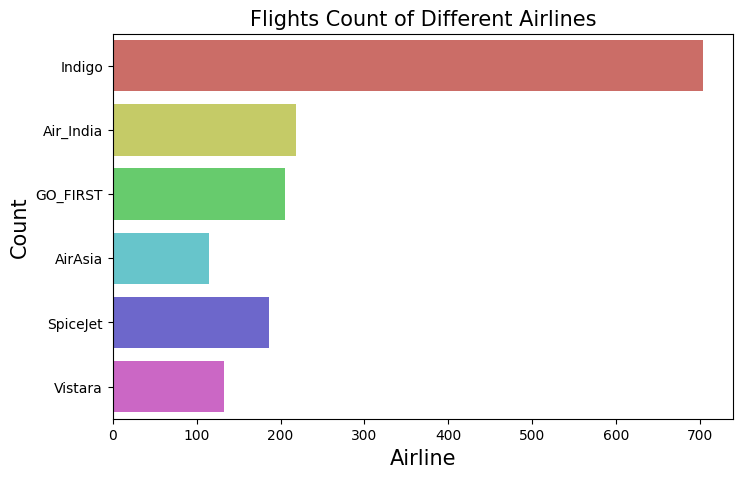

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [10]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

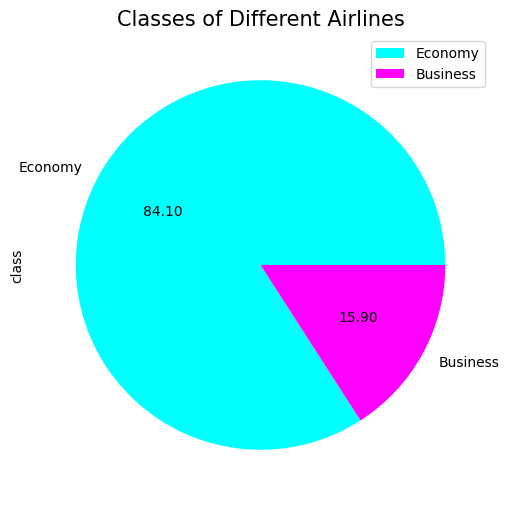

In [11]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

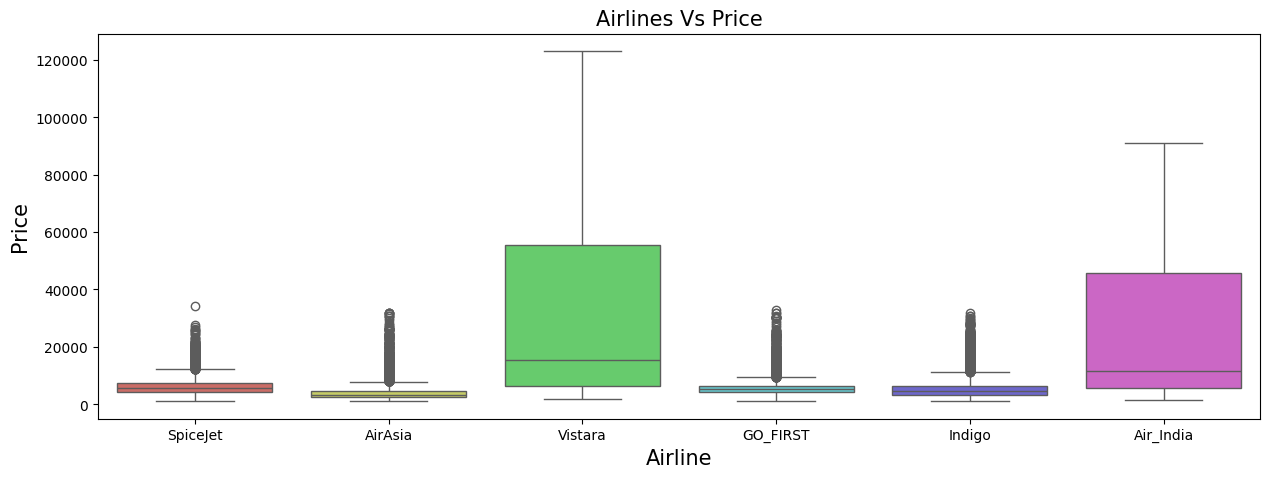

In [12]:
#price for different airline
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

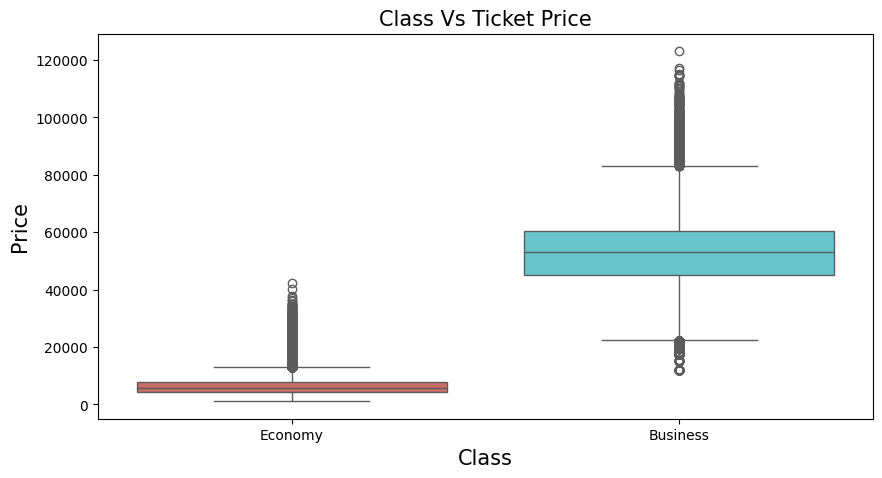

In [13]:
#price difference for different class
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

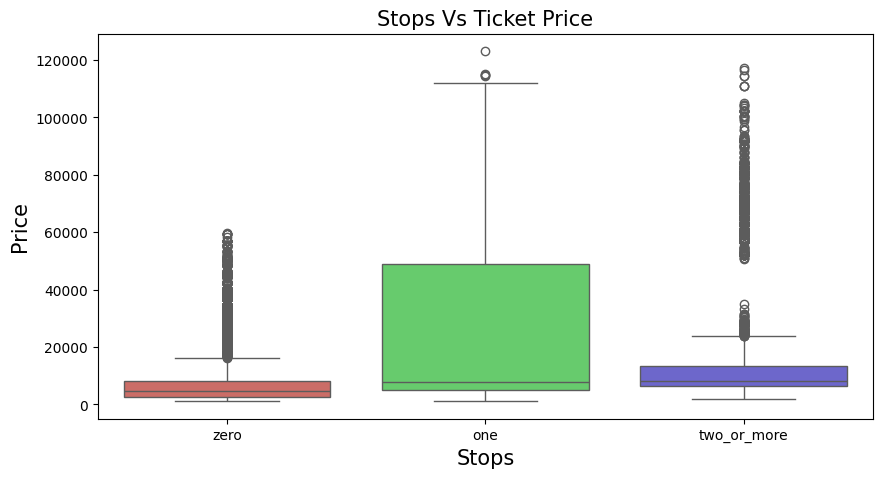

In [14]:
#price dependency on stops
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

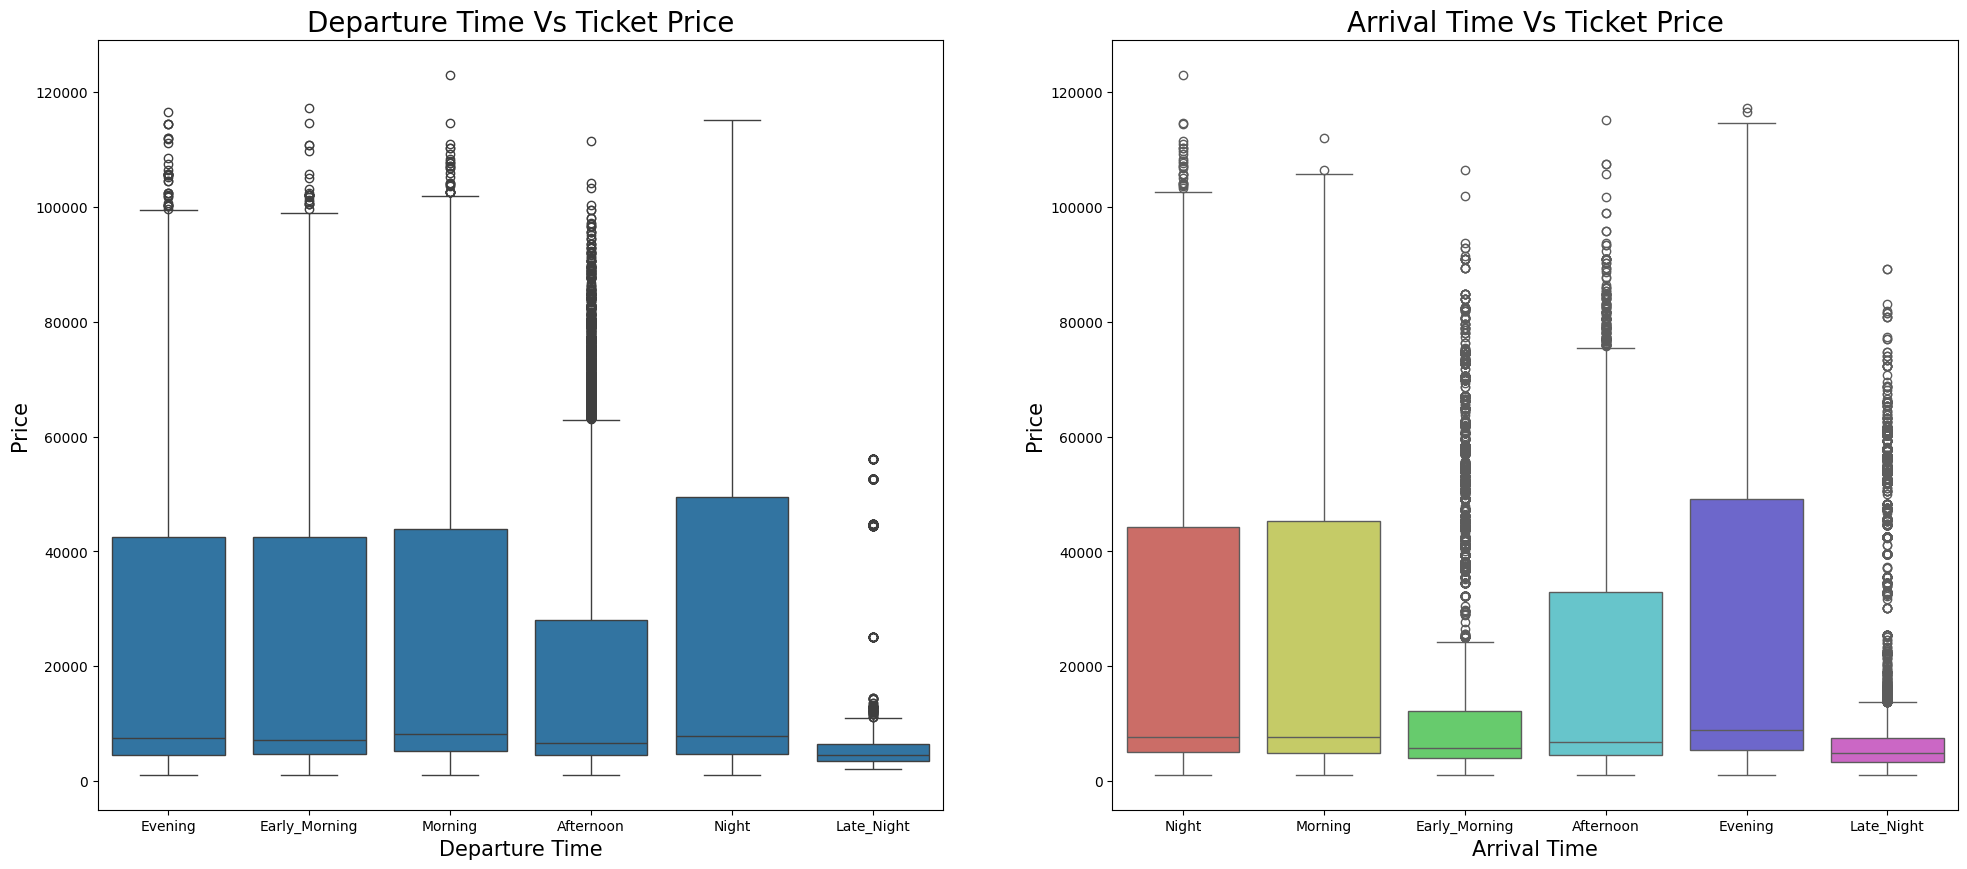

In [15]:
#ticket time based on departure and arrival time
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

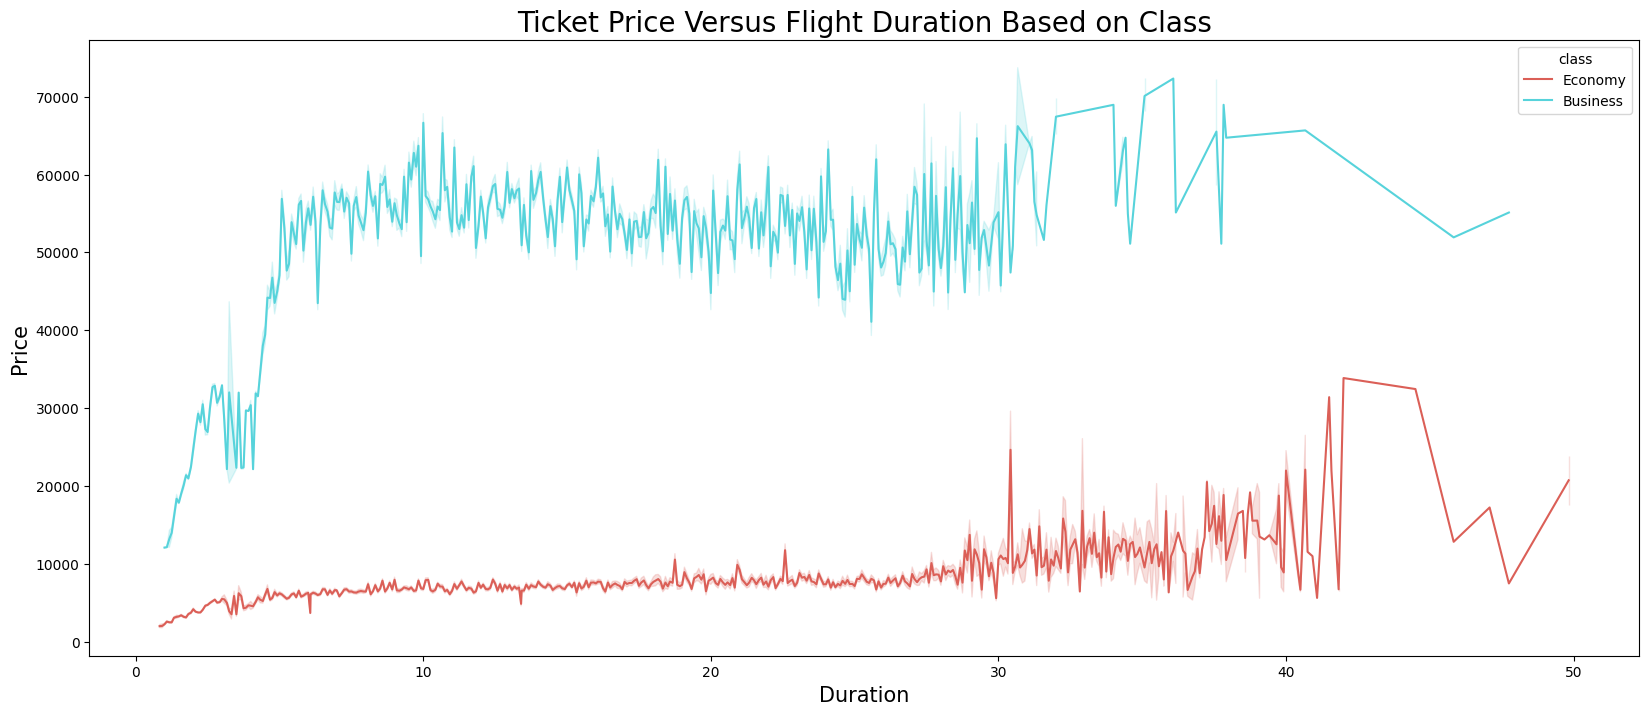

In [16]:
#ticket price based on duration of travelling
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

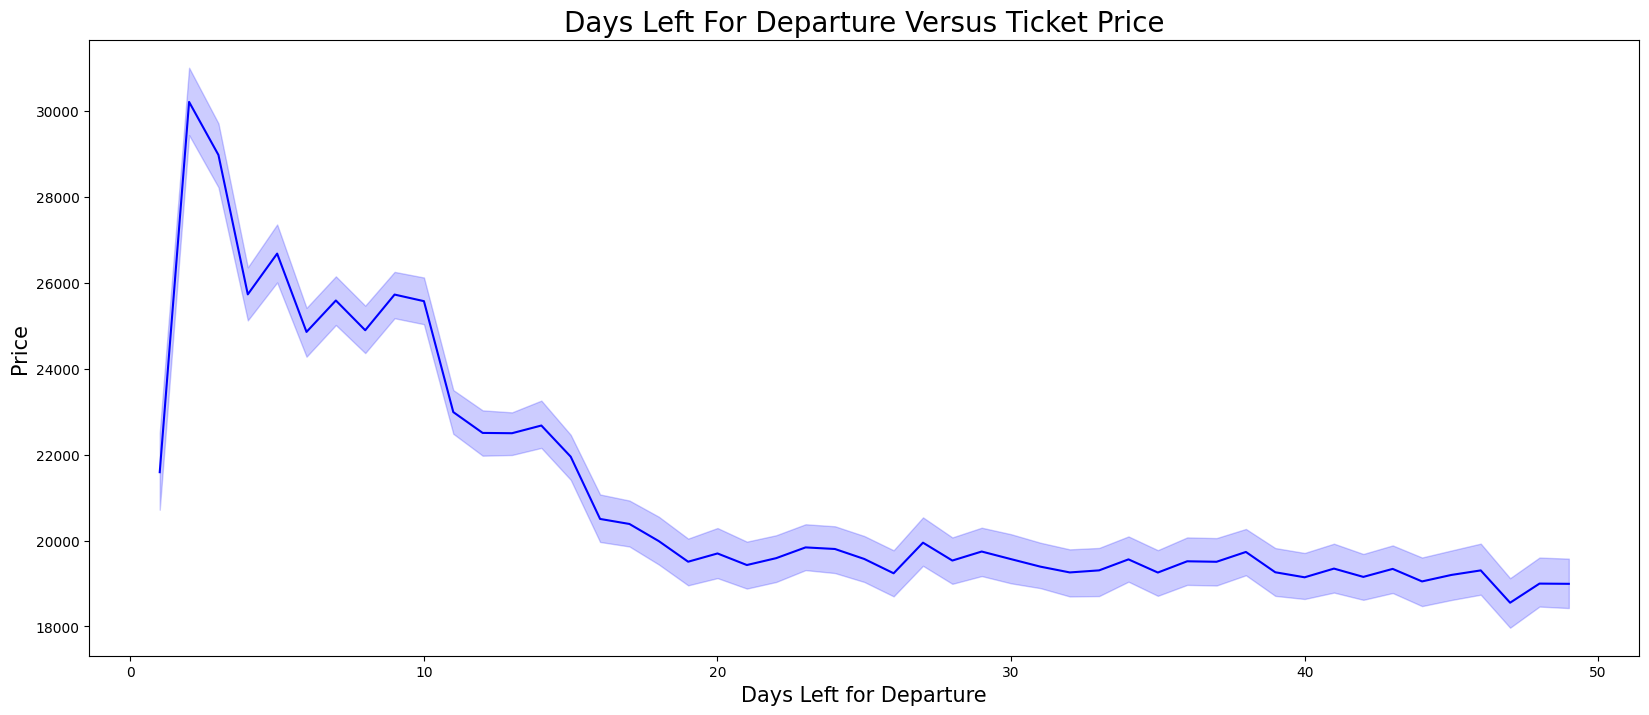

In [17]:
#ticket based on days left for flight
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

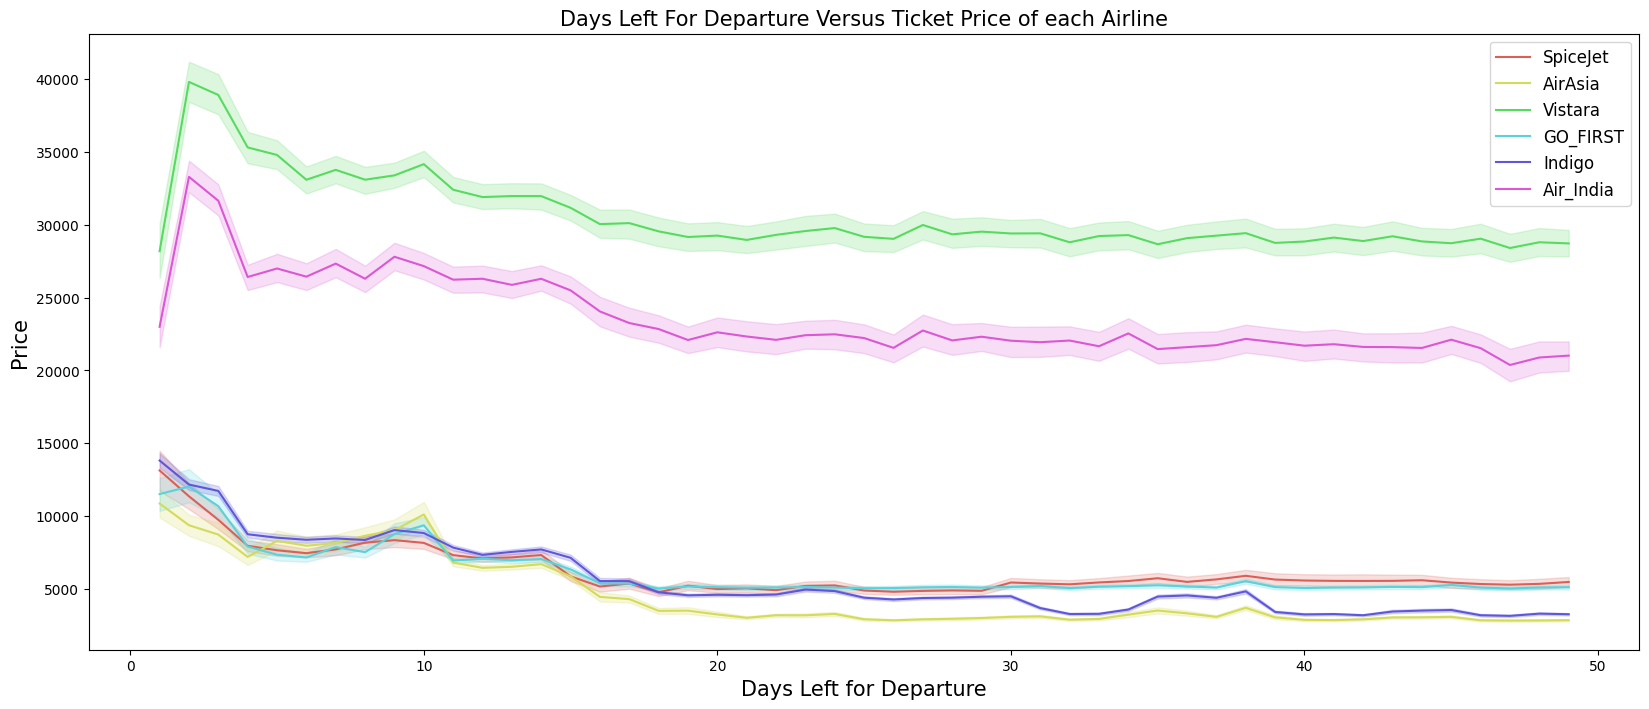

In [18]:
#ticket based on days left for different flights
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [19]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [20]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [21]:
#average price for flight from source to destination
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [22]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [23]:
x=df.drop(['price'],axis=1)
y=df['price']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [25]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

## Applying Machine learning Model and Checking accuracy of model

In [26]:
from sklearn import metrics
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Root_Mean_Squared_Error_RMSE':[],'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(x_test)

In [31]:
new_row = {'Model Name' : "LinearRegression",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results=Results.append(new_row, ignore_index=True)

### Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dtr=DecisionTreeRegressor()

In [34]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [35]:
y_pred = dtr.predict(x_test)

In [36]:
new_row = {'Model Name' : "DecisionTreeRegressor",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

### K-Nearest Neighbors Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
KNN = KNeighborsRegressor(n_neighbors=5)

In [39]:
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [40]:
y_pred = KNN.predict(x_test)

In [41]:
new_row = {'Model Name' : "KNeighborsRegressor",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

In [42]:
Results.sort_values(by="R2_score",ascending=False).reset_index(drop=True)

,Model Name,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,DecisionTreeRegressor,1262.901250,3704.880359,1.372614e+07,8.217406,0.973330
1,KNeighborsRegressor,1854.469527,3820.074173,1.459297e+07,8.248025,0.971646
2,LinearRegression,4630.295614,7005.015436,4.907024e+07,8.854382,0.904656


## Applying regularization techniques

### Ridge Regression(L2 regularization)

In [43]:
from sklearn.linear_model import Ridge

In [44]:
RE=Ridge()

In [45]:
RE.fit(x_train,y_train)

Ridge()

In [46]:
y_pred=RE.predict(x_test)

In [47]:
new_row = {'Model Name' : "Ridge",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

### Lasso Regression(R2 regularization)

In [48]:
from sklearn.linear_model import Lasso

In [49]:
LA=Lasso(alpha=0.1)

In [50]:
LA.fit(x_train,y_train)

Lasso(alpha=0.1)

In [51]:
y_pred=LA.predict(x_test)

In [52]:
new_row = {'Model Name' : "Lasso",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

### ElasticNet Regression

In [53]:
from sklearn.linear_model import ElasticNet

In [54]:
EN=ElasticNet(alpha=0.1, l1_ratio=0.5)

In [55]:
EN.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [56]:
y_pred=EN.predict(x_test)

In [57]:
new_row = {'Model Name' : "ElasticNet",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

### Bayesian Ridge regression

In [58]:
from sklearn.linear_model import BayesianRidge

In [59]:
BR=BayesianRidge()

In [60]:
BR.fit(x_train,y_train)

BayesianRidge()

In [61]:
y_pred=BR.predict(x_test)

In [62]:
new_row = {'Model Name' : "BayesianRidge",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

In [63]:
Results.sort_values(by="R2_score",ascending=False).reset_index(drop=True)

,Model Name,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,DecisionTreeRegressor,1262.901250,3704.880359,1.372614e+07,8.217406,0.973330
1,KNeighborsRegressor,1854.469527,3820.074173,1.459297e+07,8.248025,0.971646
2,Lasso,4630.179207,7005.006183,4.907011e+07,8.854380,0.904656
3,Ridge,4630.313301,7005.011583,4.907019e+07,8.854381,0.904656
4,BayesianRidge,4630.299733,7005.014535,4.907023e+07,8.854382,0.904656
5,LinearRegression,4630.295614,7005.015436,4.907024e+07,8.854382,0.904656
6,ElasticNet,5784.655465,8052.947414,6.484996e+07,8.993793,0.873996


## Applying ensemble learning for more accuracy in predication

### Bagging Regression

In [64]:
from sklearn.ensemble import BaggingRegressor

In [65]:
bagging_regressor = BaggingRegressor()

In [66]:
bagging_regressor.fit(x_train,y_train)

BaggingRegressor()

In [67]:
y_pred=bagging_regressor.predict(x_test)

In [68]:
new_row = {'Model Name' : "BaggingRegressor",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

### Random Forest Regression

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
RFR=RandomForestRegressor()

In [71]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
y_pred=RFR.predict(x_test)

In [73]:
new_row = {'Model Name' : "RandomForestRegressor",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

### Gradient Boosting Regression

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
GBR=GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [76]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [77]:
y_pred=GBR.predict(x_test)

In [78]:
new_row = {'Model Name' : "GradientBoostingRegressor",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

### Adaboosting Regression

In [79]:
from sklearn.ensemble import AdaBoostRegressor

In [80]:
ABR=AdaBoostRegressor()

In [81]:
ABR.fit(x_train,y_train)

AdaBoostRegressor()

In [82]:
y_pred=ABR.predict(x_test)

In [83]:
new_row = {'Model Name' : "AdaBoostRegressor",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

In [84]:
Results.sort_values(by="R2_score",ascending=False).reset_index(drop=True)

,Model Name,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,1170.499489,2865.039565,8.208452e+06,7.960337,0.984051
1,BaggingRegressor,1195.769821,2942.720664,8.659605e+06,7.987090,0.983174
2,DecisionTreeRegressor,1262.901250,3704.880359,1.372614e+07,8.217406,0.973330
3,KNeighborsRegressor,1854.469527,3820.074173,1.459297e+07,8.248025,0.971646
4,GradientBoostingRegressor,2808.076647,4713.931544,2.222115e+07,8.458278,0.956824
5,AdaBoostRegressor,4488.836923,6435.943885,4.142137e+07,8.769654,0.919518
6,Lasso,4630.179207,7005.006183,4.907011e+07,8.854380,0.904656
7,Ridge,4630.313301,7005.011583,4.907019e+07,8.854381,0.904656
8,BayesianRidge,4630.299733,7005.014535,4.907023e+07,8.854382,0.904656
9,LinearRegression,4630.295614,7005.015436,4.907024e+07,8.854382,0.904656


## Saving model for later use

In [85]:
import pickle
file=open("flightmodel.pkl","wb")
pickle.dump(RFR,file)

In [86]:
model=open("flightmodel.pkl","rb")
forest=pickle.load(model)

EOFError: Ran out of input